# Log likelihood calculation

$L(\theta) = -2\theta T + \int_0^T ((\alpha_s)_+ - (\alpha_s)_-)ds + \sum_{i=1}^{m+} log [(\alpha_{t_i}^{+ -})_+ + \theta] + \sum_{i=1}^{m+} log [(\alpha_{t_i}^{- -})_- + \theta]$

$\alpha_{t^-} = \eta^+ \sum_{i=1}^{n+}e^{-k(t-\tau_i^{0+})}1{t>\tau_i^{0+}} - \sum_{i=1}^{n-}e^{-k(t-\tau_i^{0-})}1{t>\tau_i^{0-}}$

https://docs.scipy.org/doc/scipy/tutorial/optimize.html

## First try

In [2]:
import numpy as np
from scipy.optimize import minimize
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])  # the 4 parameters to optimize
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [3]:
res


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.861153433422115e-17
             x: [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]
           nit: 339
          nfev: 571
 final_simplex: (array([[ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       ...,
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00]]), array([ 4.861e-17,  7.652e-17,  8.114e-17,  8.633e-17,
                        8.641e-17,  2.179e-16]))

In [4]:
import numpy as np
from scipy.optimize import minimize
from likelihood import MaximumLikelihood

T = 0.001
tau_0_plus = np.array([[0.1, 0.3, 0.5, 0.7, 0.9]]) * T
tau_0_minus = np.array([[0.2, 0.4, 0.6]]) * T
t_plus = np.array([[0.11, 0.31, 0.51, 0.71, 0.91]]) * T
t_minus = np.array([[0.21, 0.41, 0.61]]) * T

m = MaximumLikelihood(T, tau_0_plus, tau_0_minus, t_plus, t_minus)

x0 = np.array([1.3, 0.7, 0.8, 1.9])  # the 4 parameters to optimize
res = minimize(m.likelihood_to_minimize, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
res

/var/folders/rr/nsd1p9hx6hs_81m8swcypvkc0000gn/T/ipykernel_52919/1025083622.py:14: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(m.likelihood_to_minimize, x0, method='nelder-mead',


       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: -9.762244064601471e+24
             x: [ 1.288e+02  7.611e+27 -1.485e+28  1.925e+28]
           nit: 476
          nfev: 800
 final_simplex: (array([[ 1.288e+02,  7.611e+27, -1.485e+28,  1.925e+28],
                       [ 1.471e+02,  5.337e+27, -1.041e+28,  1.350e+28],
                       ...,
                       [ 1.745e+02,  3.856e+27, -7.524e+27,  9.753e+27],
                       [ 1.874e+02,  2.957e+27, -5.770e+27,  7.479e+27]]), array([-9.762e+24, -6.637e+24, -5.238e+24, -4.572e+24,
                       -3.426e+24]))

## Calculating integral of alpha_s

In [5]:
T=10
tau_0_plus = np.array([[0.1, 0.3, 0.5,0.7,0.9]]) * T
tau_0_minus = np.array([[0.2, 0.4, 0.6]])*T
tau_0 = np.concatenate(
    [np.zeros([1,1]), tau_0_minus, tau_0_plus, np.ones([1,1]) * T], axis=1
)

eta_plus = 100
eta_minus = 90
k = 200
eta_minus_vector = -np.ones([tau_0_minus.shape[1], 1]) * eta_minus
eta_plus_vector = np.ones([tau_0_plus.shape[1], 1]) * eta_plus
eta_vector = np.concatenate(
    [np.zeros([1,1]), eta_minus_vector, eta_plus_vector, np.zeros([1,1])], axis=0
).T
tau_eta = np.concatenate([tau_0, eta_vector])
result = eta_vector.T * np.ones([1, tau_0.shape[1]])

#tau_0.sort()
tau_eta = tau_eta[:,tau_eta[0, :].argsort()]
tau_0 = tau_eta[:,tau_eta[0, :].argsort()][0:1,:]
eta_0 = tau_eta[:,tau_eta[0, :].argsort()][1:2,:]
#print(result.T)
print(tau_eta)


[[  0.   1.   2.   3.   4.   5.   6.   7.   9.  10.]
 [  0. 100. -90. 100. -90. 100. -90. 100. 100.   0.]]


In [6]:
np.exp(-k*tau_0_plus)
tau_matrix = tau_0 * np.ones([1, tau_0.shape[1]]).T
tau_matrix

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.]])

In [7]:
np.exp(-k*tau_0_plus)
eta_matrix = eta_0 * np.ones([1, eta_0.shape[1]]).T
eta_matrix

array([[  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.]])

In [8]:
tau_matrix_1 = np.roll(tau_matrix,-1) # numero de fila es j, numero de columna es i
tau_matrix_1

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.]])

In [9]:
tau_matrix_diff = tau_matrix - tau_matrix.T
tau_matrix_diff

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   9.,  10.],
       [ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   8.,   9.],
       [ -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   7.,   8.],
       [ -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   6.,   7.],
       [ -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   5.,   6.],
       [ -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   4.,   5.],
       [ -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   3.,   4.],
       [ -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   2.,   3.],
       [ -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,   0.,   1.],
       [-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -1.,   0.]])

In [10]:
tau_matrix_diff

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   9.,  10.],
       [ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   8.,   9.],
       [ -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   7.,   8.],
       [ -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   6.,   7.],
       [ -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   5.,   6.],
       [ -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   4.,   5.],
       [ -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   3.,   4.],
       [ -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   2.,   3.],
       [ -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,   0.,   1.],
       [-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -1.,   0.]])

In [11]:
tau_matrix_diff = np.where(tau_matrix_diff>0, tau_matrix_diff, 0)
tau_matrix_diff

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  8.,  9.],
       [ 0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  7.,  8.],
       [ 0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  6.,  7.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  5.,  6.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  4.,  5.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
arr = np.array([[1,2,3,3],[4,5,6,6]])
print(arr)
np.sum(arr, axis=0)

[[1 2 3 3]
 [4 5 6 6]]


array([5, 7, 9, 9])

In [13]:
tau_matrix_diff_1 = tau_matrix_1 - tau_matrix.T
tau_matrix_diff_1 = np.where(tau_matrix_diff_1>0, tau_matrix_diff_1, 0)
tau_matrix_diff_1


array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  8.,  9.,  0.],
       [ 0.,  0.,  1.,  2.,  3.,  4.,  5.,  7.,  8.,  0.],
       [ 0.,  0.,  0.,  1.,  2.,  3.,  4.,  6.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  2.,  3.,  5.,  6.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  2.,  4.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [14]:
tau_matrix_diff = tau_matrix - tau_matrix.T
tau_matrix_diff = np.where(tau_matrix_diff>0, tau_matrix_diff, 0)

tau_matrix_diff_1 = tau_matrix_1 - tau_matrix.T
tau_matrix_diff_1 = np.where(tau_matrix_diff_1>0, tau_matrix_diff_1, 0)

alpha_tau_matrix = eta_matrix * (np.exp(
    -k * tau_matrix_diff_1
) - np.exp(-k * tau_matrix_diff))

alpha_tau_matrix

array([[-0.00000000e+000, -1.38389653e-085,  1.72365264e-172,
        -2.65039655e-259, -0.00000000e+000,  0.00000000e+000,
        -0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000, -1.00000000e+002,  1.24550687e-085,
        -1.91516960e-172,  2.38535690e-259,  0.00000000e+000,
        -0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  9.00000000e+001,
        -1.38389653e-085,  1.72365264e-172, -2.65039655e-259,
        -0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000, -0.00000000e+000,
        -1.00000000e+002,  1.24550687e-085, -1.91516960e-172,
         2.38535690e-259,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000, -0.00000000e+000,
         0.00000000e+000,  9.00000000e+001, -1.38389653e-085,
         1.72365264e-172

In [15]:
alpha_tau = np.sum(alpha_tau_matrix, axis=0)
alpha_tau

array([   0., -100.,   90., -100.,   90., -100.,   90., -100., -100.,
          0.])

Alpha tau should be possitive. I don't know why are they using - 1/k. May be I should modifty it to be possitive inverting the simbols

In [16]:
alpha_s_plus = np.sum(-np.where(alpha_tau>=0,alpha_tau, 0)/k)
alpha_s_plus 

-1.35

In [17]:
alpha_s_minus = np.sum(np.where(alpha_tau<=0,alpha_tau, 0)/k)
alpha_s_minus

-2.5

In [18]:
integral_alpha_s = alpha_s_plus - alpha_s_minus
integral_alpha_s


1.15

## Calculating sum log alpha t_i

In [19]:
import numpy as np
T=10
tau_0_plus = np.array([[0.1, 0.3, 0.5,0.7,0.9]]) * T
tau_0_minus = np.array([[0.2, 0.4, 0.6]])*T
t_plus = np.array([[0.11, 0.31, 0.51, 0.71, 0.91]]) * T
t_minus = np.array([[0.21, 0.41, 0.61]]) * T
eta_plus = 100
eta_minus = 90
k = 200
theta = 1

tau_0 = np.concatenate(
    [
        tau_0_minus,
        tau_0_plus,
    ],
    axis=1,
)

eta_minus_vector = -np.ones([tau_0_minus.shape[1], 1]) * eta_minus
eta_plus_vector = np.ones([tau_0_plus.shape[1], 1]) * eta_plus
eta_vector = np.concatenate([eta_minus_vector, eta_plus_vector], axis=0).T
tau_eta = np.concatenate([tau_0, eta_vector])
tau_eta = tau_eta[:, tau_eta[0, :].argsort()]
tau_0 = tau_eta[:, tau_eta[0, :].argsort()][0:1, :]
eta_0 = tau_eta[:, tau_eta[0, :].argsort()][1:2, :]

tau_matrix = tau_0 * np.ones([1, t_plus.shape[1]]).T
eta_matrix = eta_0 * np.ones([1, t_plus.shape[1]]).T
t_plus_matrix = t_plus.T * np.ones([1, tau_0.shape[1]])  # numero de fila es t, numero de columna es tau

tau_matrix_diff = t_plus_matrix - tau_matrix 
tau_matrix_diff = np.where(tau_matrix_diff > 0, tau_matrix_diff, 0)

alpha_tau_matrix = eta_matrix * (np.exp(-k * tau_matrix_diff))
alpha_tau = np.sum(alpha_tau_matrix, axis=1)
# The signs seem to be wrong in the paper, keeping them anyway
sum_log_alpha_plus = np.sum(np.log(np.where(alpha_tau >= 0, alpha_tau, 0) + theta))
sum_log_alpha_plus

18.995638800241302

## Generating simulation data to estimate parameters


In [1]:
from simulations import generate_simulations_bunchs
from parameters import Parameters, base_simulation_parameters_dict
import pandas as pd
import numpy as np


p = Parameters(**base_simulation_parameters_dict)
p.dalpha = 30
p.n = 10
p.T=60
print(p)
results = generate_simulations_bunchs(p)


Parameters(q_max=4, T=60, A=300, dalpha=30, Delta=0.005, epsilon=0.005, psi=0.01, phi_=1e-06, eta_plus=60.0, eta_minus=60.0, sigma=0.01, k=200.0, xi=1.0, lambda_plus=10.0, lambda_minus=10.0, theta=0.1, s0=100, n=10, drift=True)
Calculating h
Starting h calculation
0.0009900987375966069
60600
Starting to calculate h
Finished calculating h0 h                          5e-07 h                           
Amount of simulations: 10
Mean of PNL:0.117500000000043431488715e-08 h                              
Stde of PNL:0.8321906332089456
500


In [8]:
l = 10

## Option A: Flattening of times


In [4]:
tau0_plus = np.array([
    np.array(np.where(results["dMt0_plus"][:l,:])[1]
                               ) .flatten()
                      *p.dt]
                      )
tau0_minus = np.array([
    np.array(np.where(results["dMt0_minus"][:l,:])[1]
                                ) .flatten()
                       *p.dt]
)

print("Tau 0 minus ", tau0_minus)
print("Tau 0 plus ", tau0_plus)

Tau 0 minus  [[ 1.08291678  2.37362571  4.9890096   5.1208777   6.90709099  6.97552254
   7.72277508  8.22177594  8.97452298 12.28421238 13.18680953 13.80668948
  13.81218398 16.06443111 18.51298188 19.09140329 22.11387998 22.38710667
  24.79819492 25.76972312 26.59689572 27.86662563 28.98051144 30.18180981
  30.63235913 31.18580553 31.98900211 32.32666436 32.50948149 34.07291762
  34.48850192 34.51097943 35.4370531  36.30718273 37.55893064 39.37411495
  40.89359505 43.96502276 44.74174583 46.81966733 47.34713971 48.09489175
  49.35712916 49.4135727  49.57840782 51.15433146 52.1808047  52.44104439
  52.49748793 53.06541984 53.31067452 53.61836674 54.47401086 55.356628
  56.49698732 56.52695734 56.53544885 56.76721701  0.19730264  0.81618359
   1.72677275  2.19730209  2.75124799  3.22327583  3.94455435  4.06443444
   4.13436449  6.57442375  6.67432382  8.33366402  8.47352412  8.65134625
   8.91757994  9.86113612 10.05344376 12.25873786 13.142354   14.16732874
  15.0799159  16.16832718 1

In [5]:
tau0_minus.shape

(1, 290)

In [7]:
s_jumps = (results['s']-np.roll(results['s'], 1))
t_minus = np.array([(np.array(np.where(s_jumps[:l,:] < 0)[1]).flatten() 
                     * p.dt)])
t_plus = np.array([np.array(np.where(s_jumps[:l,:] > 0)[1]).flatten() 
                   * p.dt])
print("t_minus", t_minus)
print("t_plus", t_plus)
print("s_jumps", s_jumps)

t_minus [[ 1.09190779  1.85814134  6.91308499  7.72727058  8.22427344  8.22976795
  16.06842711 22.38910468 22.39110268 24.5004927  24.80318992 26.59739522
  27.05194055 27.5469454  27.87561664 32.51397699 34.49249792 34.51197843
  36.31467524 37.57541415 40.90758106 44.1478399  49.57990632 51.15582996
  53.06591934 53.22376145 53.31117402 56.52895534  0.20529465  1.61738217
   1.78671279  8.33416352  8.33865902  8.48301463 10.16583134 12.25973686
  13.1438525  19.19829637 19.26073392 21.98450938 24.32666658 29.56093086
  29.56942236 29.9010906  31.87311803 35.8511389  36.5374524  38.22576362
  39.20728183 40.15483401 40.15733151 41.61886957 43.86512269 44.51247516
  46.85113585 50.3836024  51.72326237 54.34513976  2.02547396  2.39060873
  14.93006579 16.16782768 18.12287209 22.94754608 31.66282838 36.59889094
  39.60888012 40.60987884 43.81816966 46.40208503 46.79119581 47.40957725
  50.94753831 51.26272304 51.39159413 52.48400142  0.          1.43706254
   4.6992994   4.89060803  4.9

Retrieving parameters to avoid doing simulation

In [7]:
m.likelihood_to_minimize(x0)

NameError: name 'm' is not defined

In [4]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood

m = MaximumLikelihood(
    p.T,
    tau0_plus,
    tau0_minus,
    t_plus,
    t_minus
)
# def multi_objective_function(x):
#     return [objective_function1(x), objective_function2(x)]
x0 = np.array([10, 100, 100, 1])  # the 4 parameters to optimize
bounds = [(1, 500), (1, 200),(1, 200),(0, 1)]
res = minimize(m.likelihood_to_minimize, x0, method='BFGS',#
               #bounds=bounds,
               options={'disp': True, 
                        # 'maxiter':1000, "maxfun":2000
                        },
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

NameError: name 'p' is not defined

## Option B: Not flattening of data but rather optimizing for the sum of results

In [3]:
from likelihood import MaximumLikelihood
tau0_plus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_plus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
s_jumps = (results['s']-np.roll(results['s'], 1))
t_minus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] < 0)), p.dt)
t_plus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] > 0)), p.dt)
t_plus_dict

{0: [0.5732671690684353,
  0.7841582001765126,
  0.838613630744326,
  0.8405938282195192,
  1.1267323633849387,
  1.672276767800669,
  1.87623710774557,
  2.510890398544995,
  2.616830963467832,
  2.9346526582363426,
  2.9366328557115358,
  3.135642701968454,
  3.6801970076465875,
  4.366335432801036,
  4.937622404394278,
  4.940592700607068,
  5.254454000425192,
  5.756434060386672,
  6.091087433694326,
  6.18019632007802,
  6.793067438650319,
  7.549502874174127,
  8.06831461267475,
  8.390096702393647,
  8.413859072095965,
  9.014849005817105,
  9.688116147382798,
  10.084155642421441,
  10.086135839896635,
  10.714848538270479,
  10.86930394133555,
  10.87524453376113,
  11.245541461622262,
  11.825739321853872,
  12.69603611220129,
  12.702966803364466,
  13.255441898943372,
  13.25643199768097,
  14.755441486402232,
  14.778213757366954,
  16.01088668567473,
  16.660391457538104,
  17.025737891711252,
  17.25940119378405,
  17.260391292521646,
  18.04157919648537,
  18.3811830634

In [4]:
multi_params = []
for i in range(l):
    t_p_arr = np.array(t_plus_dict[i])
    t_m_arr = np.array(t_minus_dict[i])
    multi_params.append(
        {
            "T": p.T,
            "tau_0_plus": np.array([tau0_plus_dict[i]]),
            "tau_0_minus": np.array([tau0_minus_dict[i]]),
            "t_plus": np.array([t_p_arr[t_p_arr != 0]]),
            "t_minus": np.array([t_m_arr[t_m_arr != 0]])
            })
multi_params[0].keys()

dict_keys(['T', 'tau_0_plus', 'tau_0_minus', 't_plus', 't_minus'])

In [5]:
print(multi_params[0]['tau_0_minus'])
print(multi_params[0]['t_minus'])
print(multi_params[0]['tau_0_plus'])
print(multi_params[0]['t_plus'])

[[ 0.13663363  0.21980192  0.33465337  0.37227713  0.50198006  0.53168302
   0.81980175  1.06138585  1.16039572  1.21980164  1.2584155   1.29702935
   1.32871251  1.35841547  1.49603919  1.50792038  1.51881146  1.60792035
   1.68019756  1.71485101  1.91485096  1.95544501  2.02178162  2.14455387
   2.14653406  2.17821722  2.40296964  2.40693003  2.53762306  2.71089034
   2.72673192  2.76237548  2.80197943  2.9049497   3.138613    3.27029613
   3.29999909  3.34554363  3.36336541  3.44554361  3.47920696  3.74257323
   3.78217718  3.80494945  3.86633557  3.98613752  4.00692959  4.33465227
   4.44158294  4.51386014  4.51881064  4.61980071  4.68217693  4.69108782
   4.73960266  4.75346404  4.85445411  4.943563    4.96831547  5.0198006
   5.4128698   5.59207767  5.70692912  5.73861228  5.78613702  5.84752314
   5.93762213  5.95346371  5.98118647  6.07722605  6.20989928  6.26633491
   6.28613689  6.29603787  6.31187945  6.33267153  6.33465172  6.5910873
   6.73366151  6.87227534  6.89207731  6

In [6]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood

def multi_likelihood_to_minimize(y, k=200, theta=0.1):
    bad_result = 1000 #np.nan
    # x=np.array([200, y[0], y[1], theta])
    x = y
    # if np.abs(x[1]-x[2]) >20:
    #     return bad_result
    # if x[0]<0 or x[1]<0 or x[2]<0 or x[3]<0:
    #     return bad_result
    # if x[0]>1500 or x[1]>1500 or x[2]>1500 or x[3]>1500:
    #     return bad_result
    m = MaximumLikelihood.multi_likelihood_to_minimize(multi_params, x)/l/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    print(m)
    return m

In [7]:


# Inequality constraints
# constraints = (
#     {'type': 'ineq', 'fun': lambda y: -np.abs(y[1] - y[2]) + 5},
# )

# x0 = np.array([200, 60, 60, 0.1])  # the 4 parameters to optimize
# x0 = np.random.rand(4)*100
x0 = np.ones(4)*100
# x0 = np.zeros(2)

# bounds = [(10, 300), (40, 500)]#,(40, 500)] #(0, 2)
options = {'maxiter': 1000}
res = minimize(multi_likelihood_to_minimize, x0, method='Nelder-Mead',#
               options=options,
            #    bounds=bounds,
            #    constraints=constraints,
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

11.353485526277375
11.29990317877437
11.379703283220584
11.37974945793904
11.9425175056228
10.762804904778681
10.173451342256966
10.723956714553879
10.39851768296443
9.948290847910437
9.252053300952515
8.972188881416557
7.8112439098428
8.093868396898644
7.26492569284129
5.703333532946688
5.281593877412828
2.8784933907151404
2.9907664702008026
1.6148392477235969


/Users/federico/Repos/marketmaking/alpha_signals/likelihood.py:146: RuntimeWarning: invalid value encountered in log
  result = np.sum(np.log(np.where(alpha_tau >= 0, alpha_tau, 0) + theta))
/Users/federico/Repos/marketmaking/alpha_signals/likelihood.py:180: RuntimeWarning: invalid value encountered in log
  result = np.sum(np.log(np.where(alpha_tau <= 0, -alpha_tau, 0) + theta))


1000
1000
5.541081688915255
0.8409458574584132
1000
1000
3.800717650770268
0.3794035057339684
1000
-0.09663649263811541
1000
1000
1.7731775858945134
-0.3780202567907983
1000
1000
0.8906679547892267
1000
0.5327042134838745
1000
0.469980673679639
-0.3431787133947645
1000
0.17477179205209922
1000
0.10435431706774993
1000
-0.005354142360019694
1000
-0.05386357850473014
-0.42196185415627097
1000
1000
-0.18592417845580098
1000
-0.21812408194058588
1000
-0.26576023738858123
1000
-0.2875207388995036
1000
-0.3134733353690929
-0.36329281649407846
1000
-0.35622054102540873
1000
-0.3722439837783017
1000
-0.3802683381476997
-0.3371003034910856
-0.41142349000815454
-0.41616576180432274
-0.4370795602651594
1000
1000
-0.40299062650818995
1000
-0.41346804053542324
-0.434192335226472
-0.4334877799865684
-0.4486982073152456
-0.461449290948854
-0.4542582685453626
-0.45719424292664407
-0.4755470378559315
-0.49321481232551406
-0.4980450568885288
-0.5214349344874747
-0.4944558012481464
-0.5240698474719154
-0

### Graph of k vs eta

In [252]:
amount = 11
k = np.linspace(100,300,amount)
eta = np.zeros(amount)
for i, k_i in enumerate(k):
    x0 = np.ones(1)*100
    options = {'maxiter': 1000}
    res = minimize(lambda j: multi_likelihood_to_minimize(j, k=k_i), x0, method='Nelder-Mead',#
                options=options,
                )
    eta[i] = res.x[0]
    print(res)

0.03369942377716861
0.03844178697442818
0.029019960571321474
0.024410197732320466
0.015433088822105085
0.006851595434071117
-0.008568289018546404
-0.019612456810504567
-0.008568289018546404
-0.01593761737494303
-0.021372890404550083
-0.01593761737494303
-0.021003993963297867
-0.020126612197931857
-0.02134398593229862
-0.02100762450088898
-0.021401829344244446
-0.02134398593229862
-0.021398858988750147
-0.021383132177322767
-0.021403132988397015
-0.021398858988750147
-0.021403168045763164
-0.021401829344244446
-0.02140332350973165
-0.021403132988397015
-0.02140328886570704
-0.021403271657876827
-0.021403316979665066
-0.021403308415856272
-0.021403322945185346
-0.021403318668294216
-0.02140332390289319
-0.021403322945185346
-0.021403323875210233
-0.021403323592858806
-0.02140332393127127
-0.021403323875210233
-0.02140332392763651
-0.021403323913796252
-0.021403323932092534
-0.02140332392763651
-0.021403323932341563
-0.02140332393127127
-0.021403323932381972
       message: Optimization t

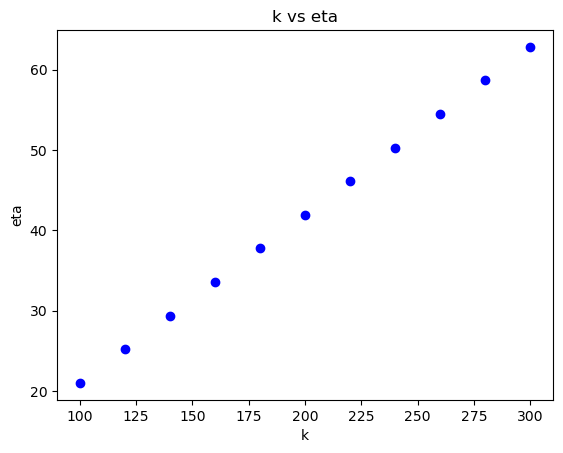

In [253]:
plt.scatter(k, eta, color='blue', marker='o')
plt.xlabel('k')
plt.ylabel('eta')
plt.title('k vs eta')
plt.show()

### Plotting the surface of eta plus and eta minus

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(20, 100, 30)
y = np.linspace(20, 100, 30)

x, y = np.meshgrid(x, y)

# Define a function for the surface
def surface_function(x, y):
    m= multi_likelihood_to_minimize(np.array([250,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)



-0.032917129421085614
-0.032917129421085614
-0.03794771397677962
-0.044771999518754726
-0.05089746874125964
-0.055993275289105505
-0.0601376610836986
-0.06325686045556894
-0.06576123576142456
-0.03743461632467494
-0.03482498943040469
-0.03915377798735992
-0.04459076269149744
-0.051174857331685454
-0.055209703487925976
-0.059523938551682254
-0.062404373256348684
-0.06472817019163579
-0.04252235120392248
-0.03861374012067929
-0.03636460983711756
-0.040011833434390916
-0.044610823743446965
-0.05036864707704271
-0.054592749098443034
-0.058490871976861265
-0.06168067903934334
-0.06424353543901619
-0.047687053679709386
-0.04341071960026533
-0.03972010338153292
-0.037611549774037675
-0.04070708211885765
-0.04501979784115778
-0.05001431717043478
-0.054190116830220035
-0.05751408185014966
-0.06089269009400172
-0.0633425988676219
-0.05245699774893264
-0.04717878760898222
-0.044011815154492026
-0.040380121279968074
-0.03862025811097675
-0.04105376144577002
-0.04497565576380568
-0.0495901189537034

In [227]:
z_min = np.nanmin(z)
x_min,y_min = np.where(z==z_min)
x_min,y_min


(array([0]), array([7]))

-0.06576123576142456
-0.032917129421085614


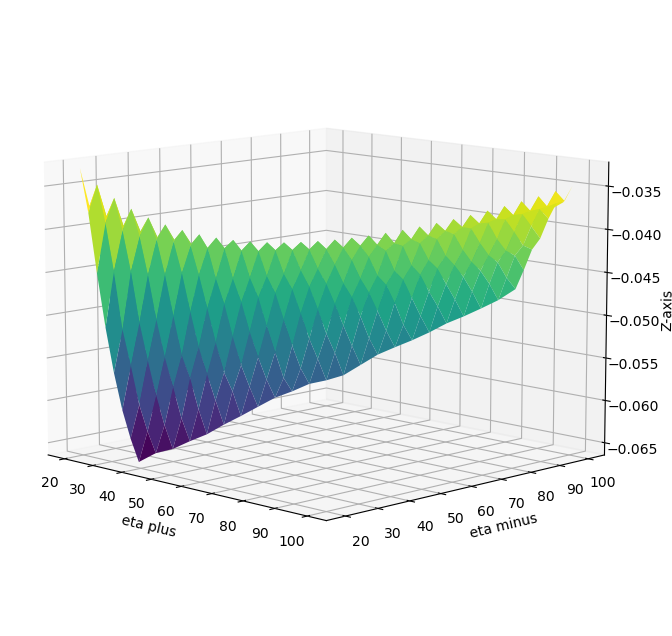

In [230]:
# Plot the surface
z_min, z_max = np.nanmin(z), np.nanmax(z)
print(z_min)
print(z_max)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=10, azim=-45)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# ax.scatter(x_min, y_min, z_min, color='red', marker='o', s=100, label='Minimum Point')

# Show the plot
plt.show()

Plotting surface of other functions

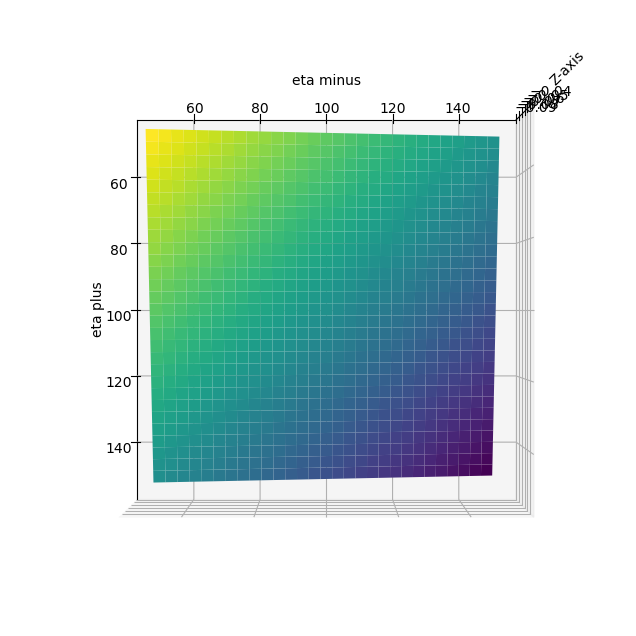

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(50, 150, 30)
y = np.linspace(50, 150, 30)

x, y = np.meshgrid(x, y)
def other_func(x):
    m = MaximumLikelihood.multi_integral_alpha(multi_params, x)/len(multi_params)/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    # print(m)
    return m
# Define a function for the surface
def surface_function(x, y):
    m= other_func(np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=0)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

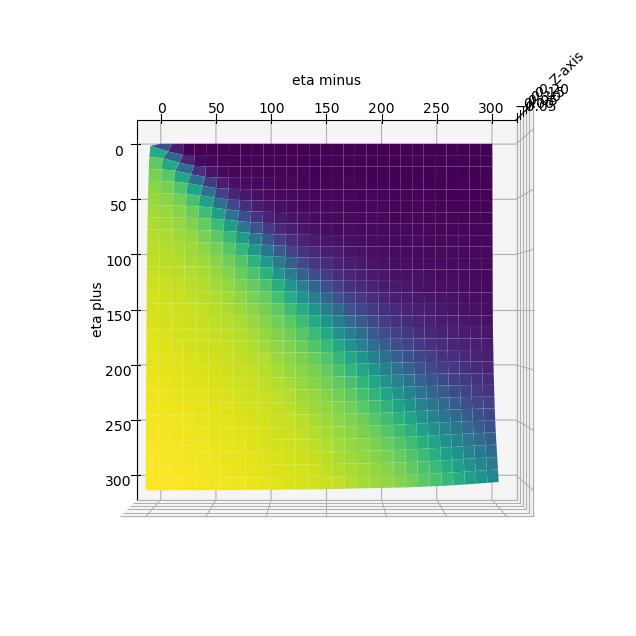

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(0, 300, 30)
y = np.linspace(0, 300, 30)

x, y = np.meshgrid(x, y)
def other_func(x):
    m = MaximumLikelihood.multi_sum_log_alpha_plus(multi_params, x)/len(multi_params)/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    # print(m)
    return m
# Define a function for the surface
def surface_function(x, y):
    m= other_func(np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=0)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

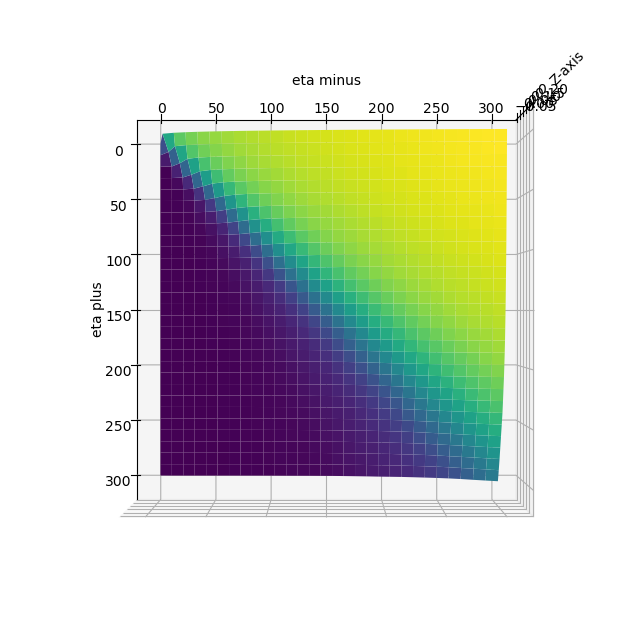

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(0, 300, 30)
y = np.linspace(0, 300, 30)

x, y = np.meshgrid(x, y)
def other_func(x):
    m = MaximumLikelihood.multi_sum_log_alpha_minus(multi_params, x)/len(multi_params)/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    # print(m)
    return m
# Define a function for the surface
def surface_function(x, y):
    m= other_func(np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=0)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

Sum of eta plus and eta minus integrals

In [73]:
z.shape

(5452,)

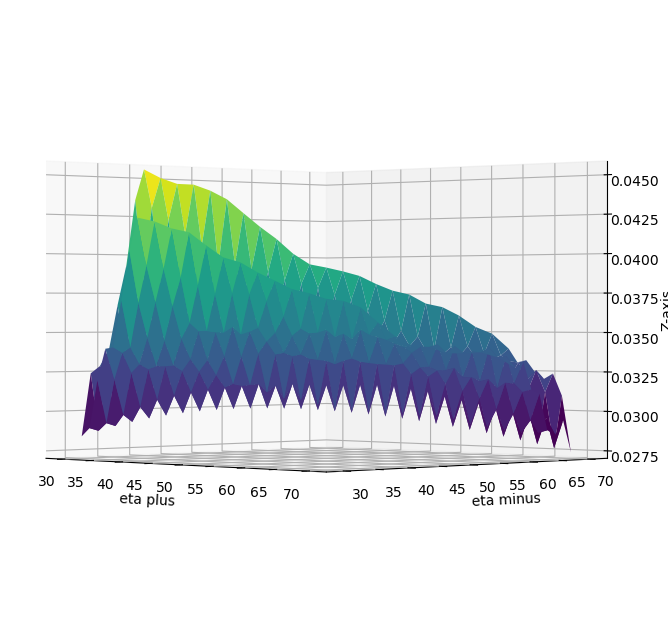

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(30, 70, 30)
y = np.linspace(30, 70, 30)

x, y = np.meshgrid(x, y)

# # Apply the constraint
# mask = np.abs(x - y) < 20
# x = x[mask]
# y = y[mask]

def other_func(x):
    m = MaximumLikelihood.multi_sum_log_alpha_minus(multi_params, x)/len(multi_params)/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    # print(m)
    p = MaximumLikelihood.multi_sum_log_alpha_plus(multi_params, x)/len(multi_params)/1000
    if np.isnan(p) or np.isinf(p):
        n = 1000
    a = MaximumLikelihood.multi_integral_alpha(multi_params, x)/len(multi_params)/1000
    if np.isnan(a) or np.isinf(a):
        a = 1000
    # print(m)
    return m + p + a

# Define a function for the surface
def surface_function(x, y):
    if np.abs(x-y) >10:
        return np.nan
    m= other_func(np.array([220,x,y,0.05]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
# ax.scatter(x, y, z, c=z, cmap='viridis')
ax.view_init(elev=0, azim=-45)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

## Avoid having to simulate t times

In [1]:
import numpy as np

from simulations import generate_simulations_bunchs
from parameters import Parameters, base_simulation_parameters_dict
import pandas as pd
import numpy as np


p = Parameters(**base_simulation_parameters_dict)
p.dalpha = 30
p.n = 1000
print(p)

tau0_minus=np.array([[1.08291678,2.37362571,4.9890096,5.1208777,6.90709099,6.97552254
,7.72277508,8.22177594,8.97452298,12.28421238,13.18680953,13.80668948
,13.81218398,16.06443111,18.51298188,19.09140329,22.11387998,22.38710667
,24.79819492,25.76972312,26.59689572,27.86662563,28.98051144,30.18180981
,30.63235913,31.18580553,31.98900211,32.32666436,32.50948149,34.07291762
,34.48850192,34.51097943,35.4370531,36.30718273,37.55893064,39.37411495
,40.89359505,43.96502276,44.74174583,46.81966733,47.34713971,48.09489175
,49.35712916,49.4135727,49.57840782,51.15433146,52.1808047,52.44104439
,52.49748793,53.06541984,53.31067452,53.61836674,54.47401086,55.356628
,56.49698732,56.52695734,56.53544885,56.76721701
,0.19730264,0.81618359
# ,1.72677275,2.19730209,2.75124799,3.22327583,3.94455435,4.06443444
# ,4.13436449,6.57442375,6.67432382,8.33366402,8.47352412,8.65134625
# ,8.91757994,9.86113612,10.05344376,12.25873786,13.142354,14.16732874
# ,15.0799159,16.16832718,16.66133404,19.25973492,19.96153292,20.33465969
# ,21.42107298,24.31667657,27.37811428,27.4035888,29.44904278,29.56043136
# ,29.8975941,31.76622495,32.68130961,33.00098984,35.8506394,35.93455546
# ,36.5344554,36.80868109,37.15283684,37.85563385,38.22326612,38.42206726
# ,38.57841087,39.20628283,39.48550353,39.85163729,40.15433451,41.61837007
# ,43.86462319,44.36162605,44.50748016,45.83015711,46.84713985,47.00697996
# ,51.40807764,51.71926637,52.16132419,53.15682841,53.27620899,54.1243606
# ,54.29868623,54.34364126,56.64583843,2.37762172,3.35264642,3.5924066
# ,6.28671154,8.89160592,9.15184561,9.77422306,10.23426289,11.69779895
# ,12.24625035,13.88361253,14.28970632,14.87761825,14.92806779,15.81268292
# ,16.16732818,18.51497988,19.13685783,22.39360018,22.94005357,23.64684658
# ,25.16183118,26.74874383,27.80368859,27.90658566,28.56492714,28.76372828
# ,28.87811386,29.81667504,31.07491645,32.9355553,32.9470438,33.50248821
# ,34.62936102,36.20578416,36.77971007,36.99349623,37.81567382,37.94554392
# ,40.31217663,40.60638234,42.00748085,43.80967815,46.78919781,47.40208475
# ,48.78919725,50.46651946,50.77970619,50.94404181,56.6078764,58.18829554
# ,0.53246738,0.54395589,3.12537376,4.69879989,4.97102759,5.62936907
# ,6.19230597,7.40259535,7.67831955,9.50998737,10.04395326,10.9315654
# ,12.35264392,13.79020596,14.84265322,14.88111475,15.62187379,16.09140413
# ,17.76423083,17.93106396,18.66133348,19.99100344,20.37561872,20.96952465
# ,21.62087312,25.37611683,25.55993297,26.07291984,28.35613599,28.84115084
# ,29.71877297,31.72826292,33.16432646,33.29969106,34.72826209,36.66632349
# ,36.89959016,37.52246711,38.60638289,39.18880031,41.74873966,41.77021818
# ,44.32616153,47.08390302,47.12386305,47.60238439,48.46052601,49.15083551
# ,49.6952909,50.74024566,51.47600969,51.73674888,53.35163355,53.40907609
# ,54.32615875,57.37560845,59.68330012,0.22827166,0.79920058,2.69580345
# ,3.41808097,3.68331566,4.0159829,4.79270596,5.6733251,6.99200605
# ,7.17831969,7.55294496,7.87212569,8.39410356,9.72377353,12.29420238
# ,14.89010576,15.39010562,16.55743796,16.56143397,17.67531977,19.22776689
# ,20.07442,20.25274163,22.89909454,23.21228127,23.45254094,23.92406929
# ,27.91158067,29.69329845,31.142349,32.63036058,35.4330571,36.00348651
# ,36.00548451,37.15333634,37.25573392,39.20178732,40.81317549,40.81866999
# ,41.54094751,42.6313568,43.02096708,44.4290586,44.87461292,46.39559152
# ,46.46502207,50.15682924,50.76072517,51.82316244,52.81067466,53.58689822
# ,54.10787709,56.62336091,56.82865556,57.45452951,58.04144243,58.08140246
# ,58.22026356,59.39858492
]])
tau0_plus = np.array([[4.49400475,4.85314551,5.06193666,6.26123702,7.616881,7.87062719
,9.23775967,9.46852884,9.65684048,10.30818895,10.31118595,12.66083565
,12.83266377,15.27721854,16.44654888,18.18231264,18.37511978,19.19230237
,20.36562871,22.6997939,23.79120219,23.91707628,23.9505428,24.03345986
,24.07491839,27.61487745,28.77621579,29.69479695,29.96702465,30.5933981
,31.2817096,31.56542581,32.32816286,32.58190904,34.07291762,36.70678302
,37.46652307,37.5129766,37.97601344,38.63335591,39.81517377,40.13035849
,42.47451369,48.1663203,48.9929934,51.13085494,52.91457073,53.61536974
,53.90058444,54.02945554,54.19479016,54.5294554,54.76372107,54.86012464
,54.93405069,57.45452951,58.32166214,59.18829526
# ,2.94255663,3.35564342
# ,4.47452423,5.537461,8.70928829,8.91508244,9.15983762,9.85813912
# ,10.44205504,10.70079623,10.80469231,10.88011686,11.50249431,11.64635041
# ,11.91707961,13.9750211,15.87062497,16.28121426,16.60039499,17.93555946
# ,19.10938531,20.01997446,21.53495906,21.63086313,22.05094293,22.32416963
# ,22.86013352,23.73425915,25.7457471,29.26822365,29.79269903,31.35014115
# ,31.49699426,32.17281824,32.29269833,33.93455602,34.16432618,34.88610421
# ,34.93355674,35.91007995,36.86012963,37.31017946,37.65783171,38.01447497
# ,38.72326598,40.82316549,41.00848013,41.37561289,43.21527272,47.57041637
# ,48.08240424,48.80618026,51.19179399,55.39608852,55.9225619,56.75822601
# ,57.31566841,59.00747613,59.31416935,59.40108242,59.42355993,0.46053933
# ,1.1118878,1.26673292,3.26373536,4.40409468,4.60089782,5.56942902
# ,7.86812968,10.16133584,10.47352357,11.18081608,11.45154527,12.3241724
# ,13.53995628,14.10638969,14.77172417,16.72926609,17.66982527,17.68930578
# ,19.45553906,19.60139316,20.58990438,24.33565758,25.79120163,27.07791456
# ,27.19529715,27.61537695,28.59439766,29.55393785,29.67431744,30.4520395
# ,31.04694443,33.61137928,34.07541512,34.79069964,35.65883126,35.7122778
# ,37.79369581,39.81117776,40.24174707,41.57591254,42.4875007,42.93205602
# ,43.03495309,43.4545334,45.70628102,45.82066661,46.80418282,47.26572115
# ,49.93005607,50.41457142,50.64883709,51.03894688,52.91407123,55.96352093
# ,57.89359033,58.19179204,58.77321046,0.45304683,1.50099858,2.39710223
# ,2.48351579,3.38461445,4.95504358,6.40209613,7.27672126,7.38561234
# ,8.47052712,11.3426542,12.16533129,13.15683951,15.0934024,15.75324238
# ,16.56892647,16.67432105,17.83016488,18.2647302,20.0689255,20.4850093
# ,20.58890538,21.72277119,26.35214054,27.22227017,29.13935255,29.41307875
# ,30.3081834,31.23775357,32.64784309,34.1868037,37.03095875,38.2062831
# ,41.46302546,42.19729099,45.46252485,45.55543191,45.75972756,45.92356368
# ,48.18929732,50.18580026,52.65732804,54.03295204,54.43155333,54.71127353
# ,55.42356104,55.98549895,56.17680759,56.93504914,57.37061345,58.36711667
# ,59.14383973,59.9340493,1.16283684,1.29670294,1.43856104,3.07692222
# ,4.7102884,5.30619233,6.51897921,6.65584231,8.76772983,9.22876867
# ,10.43406304,10.73126575,11.12187504,12.0404562,12.90259382,13.32567063
# ,13.51298326,15.24325251,15.34515059,15.43406165,15.67631933,16.68031505
# ,17.46952562,18.25274219,18.55993491,20.69629795,25.36562733,25.95004275
# ,27.02197052,28.0983938,29.41907276,30.04544621,31.38660468,31.39909219
# ,31.98051061,32.13585522,32.2512398,33.97701355,35.36962055,36.91257717
# ,39.34314593,40.40758119,41.75123717,47.07341351,50.20228377,51.36362211
# ,54.28370122,54.44204283,54.75722756,55.23874591,55.32016447,58.03145243
# ,58.45303073,58.60637734,59.69678663
]])
t_plus=np.array([[10.31218495,18.38011478,20.36662771,23.93056279,26.05343932
,28.77721479,39.82516377,50.74973617,52.91606923,54.03195304,54.77820658
,54.86761714,58.32465914,59.98399934,
# 9.16333412,11.64834842
# ,11.92257411,14.43605993,16.6058895,17.94704797,22.32516863,22.86063302
# ,28.67331872,34.16682369,34.89759271,35.91707295,39.29719189,45.59239494
# ,47.57591087,48.08390274,48.80817826,55.44304156
# ,0.46653334
# ,4.40459418,4.40859019,4.60189682,4.60539333,7.25374424,11.46153528
# ,19.45953506,20.57741687,25.79270014,27.62087146,33.61787279,34.07741312
# ,35.65933076,39.81467427,41.23175679,44.30817951,44.68180578,54.16581913
# ,3.38611295,7.38711084,8.49700064,12.16832829,13.15883751,16.67482055
# ,17.83865639,18.32217274,27.23126117,34.12236815,37.59639316,41.98050783
# ,42.19779049,45.46402335,48.20977683,50.09638969,52.66482055,54.03644854
# ,57.37111295,59.14533823,1.16883084,1.17182785,3.78221673
# ,5.9525458,8.77422334,10.43556154,10.43656054,13.33116513,13.33566064
# ,15.43805765,15.44555016,25.95803475,27.02296952,27.02396852,29.42306876
# ,30.10688475,34.35563482,36.92306668,50.20428177,54.45053434,55.32116347
# ,58.60787584,58.60837534,59.69828513,59.69878463,59.70278064
]]) #*1.0001
t_minus=np.array([[1.09190779,1.85814134,6.91308499,7.72727058,8.22427344,8.22976795
,16.06842711,22.38910468,22.39110268,24.5004927,24.80318992,26.59739522
,27.05194055,27.5469454,27.87561664,32.51397699,34.49249792,34.51197843
,36.31467524,37.57541415,40.90758106,44.1478399,49.57990632,51.15582996
,53.06591934,53.22376145,53.31117402,56.52895534
# ,0.20529465,1.61738217
# ,1.78671279,8.33416352,8.33865902,8.48301463,10.16583134,12.25973686
# ,13.1438525,19.19829637,19.26073392,21.98450938,24.32666658,29.56093086
# ,29.56942236,29.9010906,31.87311803,35.8511389,36.5374524,38.22576362
# ,39.20728183,40.15483401,40.15733151,41.61886957,43.86512269,44.51247516
# ,46.85113585,50.3836024,51.72326237,54.34513976,2.02547396,2.39060873
# ,14.93006579,16.16782768,18.12287209,22.94754608,31.66282838,36.59889094
# ,39.60888012,40.60987884,43.81816966,46.40208503,46.79119581,47.40957725
# ,50.94753831,51.26272304,51.39159413,52.48400142,1.43706254
# ,4.6992994,4.89060803,4.97552309,7.54495295,8.08840934,16.09540013
# ,20.37661772,25.37811484,25.37911384,33.16382696,33.16582496,36.66981999
# ,36.6783115,47.12686005,49.15882752,53.53395118,57.37710695,57.38360046
# ,58.19528855,59.70527814,0.81718259,7.18131669,7.55943846,12.26123536
# ,12.29570088,16.7517436,26.14284989,29.6238679,31.1448465,35.44754261
# ,36.01847152,37.25823142,38.79968953,39.43855049,40.81567299,42.6343538
# ,43.02146658,43.02196608,44.4325551,44.43954811,47.91607062,51.82466094
# ,52.81666866,56.84414007,58.04244144,58.08589797,59.40108242
]]) #*1.0001

multi_params = [
        {
            "T": p.T,
            "tau_0_plus": tau0_plus,
            "tau_0_minus": tau0_minus,
            "t_plus": t_plus,
            "t_minus": t_minus
            }]
l=1
print(multi_params)

# ,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30


Parameters(q_max=4, T=60, A=300, dalpha=30, Delta=0.005, epsilon=0.005, psi=0.01, phi_=1e-06, eta_plus=60.0, eta_minus=60.0, sigma=0.01, k=200.0, xi=1.0, lambda_plus=1.0, lambda_minus=1.0, theta=0.1, s0=100, n=1000, drift=True)
[{'T': 60, 'tau_0_plus': array([[ 4.49400475,  4.85314551,  5.06193666,  6.26123702,  7.616881  ,
         7.87062719,  9.23775967,  9.46852884,  9.65684048, 10.30818895,
        10.31118595, 12.66083565, 12.83266377, 15.27721854, 16.44654888,
        18.18231264, 18.37511978, 19.19230237, 20.36562871, 22.6997939 ,
        23.79120219, 23.91707628, 23.9505428 , 24.03345986, 24.07491839,
        27.61487745, 28.77621579, 29.69479695, 29.96702465, 30.5933981 ,
        31.2817096 , 31.56542581, 32.32816286, 32.58190904, 34.07291762,
        36.70678302, 37.46652307, 37.5129766 , 37.97601344, 38.63335591,
        39.81517377, 40.13035849, 42.47451369, 48.1663203 , 48.9929934 ,
        51.13085494, 52.91457073, 53.61536974, 53.90058444, 54.02945554,
        54.194790

In [2]:
print(tau0_plus.shape)
print(tau0_minus.shape)
print(t_plus.shape)
print(t_minus.shape)

(1, 58)
(1, 60)
(1, 14)
(1, 28)


In [3]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood

def multi_likelihood_to_minimize(y, k=200, theta=0.1):
    bad_result = 1000 #np.nan
    # x = np.array([y[0], y[1],y[2], theta])
    x=y

    # if np.abs(x[1]-x[2]) >20:
    #     return bad_result
    # if x[0]<0 or x[1]<0 or x[2]<0 or x[3]<0:
    #     return bad_result
    # if x[0]>1500 or x[1]>1500 or x[2]>1500 or x[3]>1500:
        # return bad_result
    m = MaximumLikelihood.multi_likelihood_to_minimize(multi_params, x)/l/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    print(m)
    return m

In [4]:
MaximumLikelihood.multi_likelihood_to_minimize(multi_params, np.array([200,600,600,0.1]))

208.82393007031925

In [5]:

# Inequality constraints
# constraints = (
#     {'type': 'ineq', 'fun': lambda y: -np.abs(y[1] - y[2]) + 5},
# )

# x0 = np.array([200, 60, 60, 0.1])  # the 4 parameters to optimize

# x0 = np.array([200, 50, 50, 0.2])  # the 4 parameters to optimize
# x0 = np.random.rand(4)*100
x0 = np.ones(4)*100
# x0 = np.zeros(2)

bounds = [(0, 100000), (0, 100000), (0, 100000), (0, 100000)] #(0, 2)
options = {'maxiter': 100000}
res = minimize(multi_likelihood_to_minimize, x0, method="Nelder-Mead",#method='L-BFGS-B',#
               options=options,
               # bounds=bounds,
            #    constraints=constraints,
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

11.908014609647413
11.902651046195208
11.910756488974112
11.910541861703006
12.506578552038722
11.309313710298863
10.710761838748297
11.305253679010415
11.003080084210598
10.553256464440155
9.876550812607071
9.545048790373631
8.36668602253209
8.673372211098949
7.8105575813904045
6.21522500006855
5.858055613655664
3.437634630285897
3.4709040866237433
2.075809052739713
1000
1000
6.0811679632068465
1.3236077205239571
1000
1000
4.327113402898618
0.8320431674346639
1000
0.3726901014006096
1000
1000
2.291840401118256
0.028602660695128946
1000
1000
1.3534148503631804
1000
0.9933191391749371
1000
0.9372759230185086
0.0927176135276836
1000
0.6311076449230846
1000
0.5536793474456119
1000
0.44411270638287553
1000
0.39195820198120535
0.006020652482776541
1000
1000
0.25537829668657785
1000
0.23126496696352986
1000
0.17034326626635415
1000
0.1508856112219364
1000
0.1184672608054768
0.06076872726235931
1000
0.07040456066309682
1000
0.055164298239159894
1000
0.04252918770918305
0.09266492192610853
0.0

/Users/federico/Repos/marketmaking/alpha_signals/likelihood.py:150: RuntimeWarning: invalid value encountered in log
  result = np.sum(np.log(np.where(alpha_tau >= 0, alpha_tau, 0) + theta))
/Users/federico/Repos/marketmaking/alpha_signals/likelihood.py:184: RuntimeWarning: invalid value encountered in log
  result = np.sum(np.log(np.where(alpha_tau <= 0, -alpha_tau, 0) + theta))


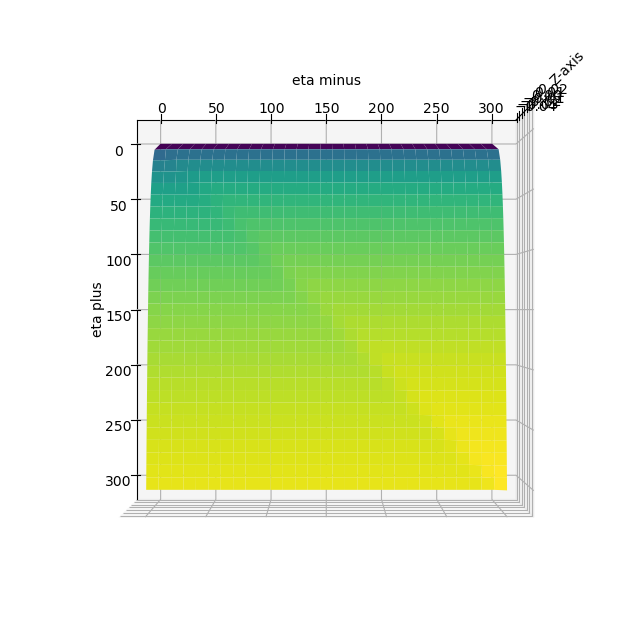

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(0.1, 300, 30)
y = np.linspace(0.1, 300, 30)

x, y = np.meshgrid(x, y)
def other_func(x):
    m = MaximumLikelihood.multi_sum_log_alpha_plus(multi_params, x)/len(multi_params)/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    # print(m)
    return m
# Define a function for the surface
def surface_function(x, y):
    m= other_func(np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=0)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

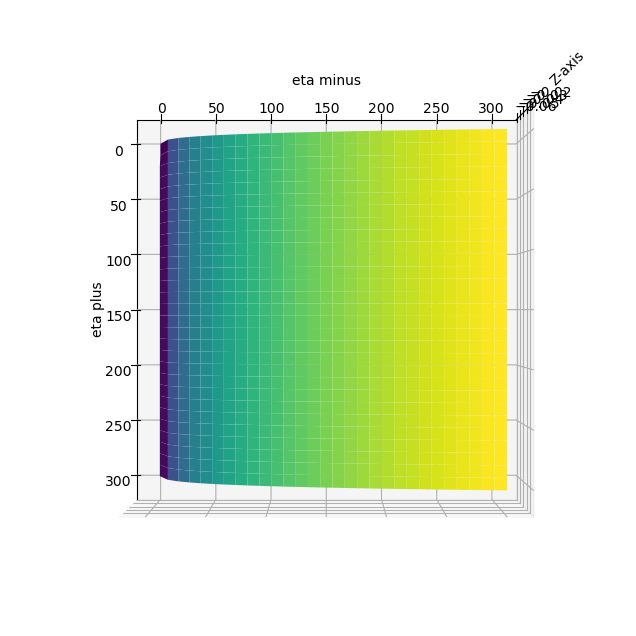

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(0.1, 300, 30)
y = np.linspace(0.1, 300, 30)

x, y = np.meshgrid(x, y)
def other_func(x):
    m = MaximumLikelihood.multi_sum_log_alpha_minus(multi_params, x)/len(multi_params)/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    # print(m)
    return m
# Define a function for the surface
def surface_function(x, y):
    m= other_func(np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=0)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

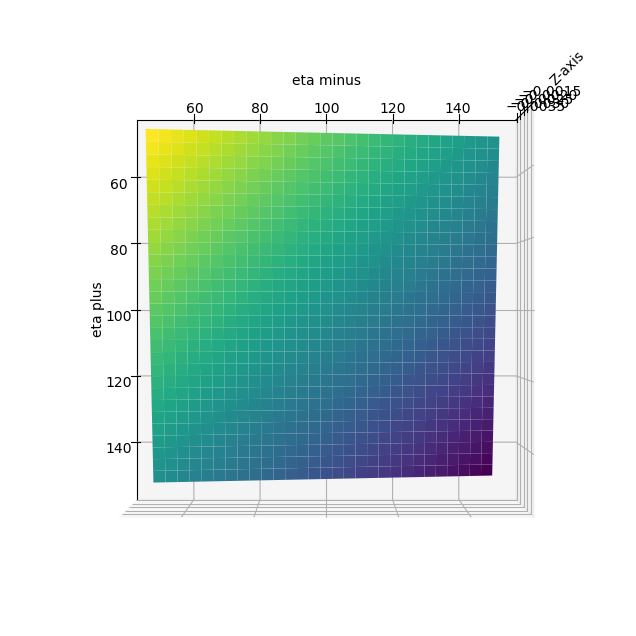

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(50, 150, 30)
y = np.linspace(50, 150, 30)

x, y = np.meshgrid(x, y)
def other_func(x):
    m = MaximumLikelihood.multi_integral_alpha(multi_params, x)/len(multi_params)/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    # print(m)
    return m
# Define a function for the surface
def surface_function(x, y):
    m= other_func(np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=0)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

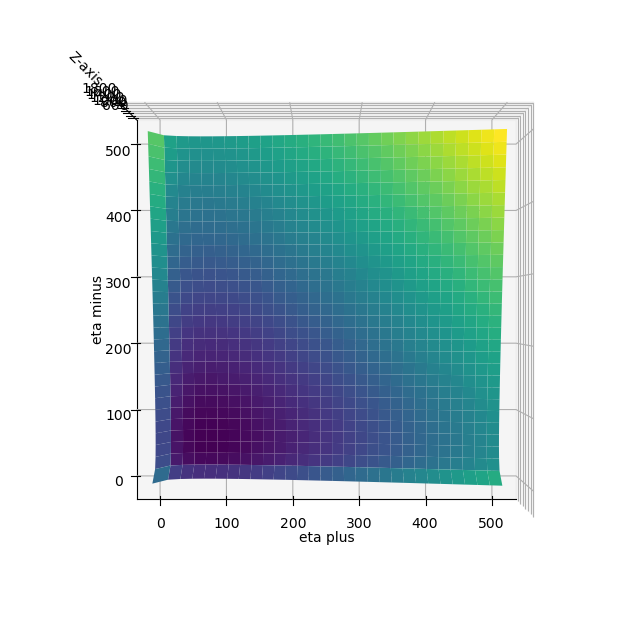

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from likelihood import MaximumLikelihood

# Create a bidimensional grid
x = np.linspace(1, 500, 30)
y = np.linspace(1, 500, 30)

x, y = np.meshgrid(x, y)

# # Apply the constraint
# mask = np.abs(x - y) < 20
# x = x[mask]
# y = y[mask]

def other_func(x):
    m = MaximumLikelihood.multi_sum_log_alpha_minus(multi_params, x)/len(multi_params)/1000
    # if np.isnan(m) or np.isinf(m):
    #     m = 1000
    # print(m)
    p = MaximumLikelihood.multi_sum_log_alpha_plus(multi_params, x)/len(multi_params)/1000
    # if np.isnan(p) or np.isinf(p):
    #     n = 1000
    a = MaximumLikelihood.multi_integral_alpha(multi_params, x)/len(multi_params)/1000
    # if np.isnan(a) or np.isinf(a):
    #     a = 1000
    # print(m)
    all = MaximumLikelihood.multi_likelihood_to_minimize(multi_params, x)
    
    return all

# Define a function for the surface
def surface_function(x, y):
    # if np.abs(x-y) >40:
    #     return np.nan
    m= other_func(np.array([260,x,y,0.2]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
# ax.scatter(x, y, z, c=z, cmap='viridis')
ax.view_init(elev=90, azim=-90)

# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

## Maximum likelihood using longer T

In [254]:
from simulations import generate_simulations_bunchs
from parameters import Parameters, base_simulation_parameters_dict
import pandas as pd
import numpy as np


p = Parameters(**base_simulation_parameters_dict)
p.dalpha = 30
p.T = 300
p.n = 200
print(p)
results = generate_simulations_bunchs(p)


Parameters(q_max=4, T=300, A=300, dalpha=30, Delta=0.005, epsilon=0.005, psi=0.01, phi_=1e-06, eta_plus=60.0, eta_minus=60.0, sigma=0.01, k=200.0, xi=1.0, lambda_plus=1.0, lambda_minus=1.0, theta=0.1, s0=100, n=200, drift=True)
Calculating h
Starting h calculation
0.0004995003608890108
600600
Starting to calculate h
Finished calculating h0.0 h                          4e-07 h                           
Amount of simulations: 200
Mean of PNL:1.1638749999992364285156e-07 h                              
Stde of PNL:0.42180755016376953
500


In [288]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood


def multi_likelihood_to_minimize(y, k=200, theta=0.1):
    bad_result = np.nan #1000 #
    x=np.array([y[0], y[1], y[1], y[2]])
    if np.abs(x[1]-x[2]) >20:
        return bad_result
    if x[0]<0 or x[1]<0 or x[2]<0 or x[3]<0:
        return bad_result
    if x[0]>1500 or x[1]>1500 or x[2]>1500 or x[3]>1500:
        return bad_result
    m = MaximumLikelihood.multi_likelihood_to_minimize(multi_params, x)/l/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    print(m)
    return m

In [289]:
l = 5

In [290]:
from likelihood import MaximumLikelihood
tau0_plus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_plus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
s_jumps = (results['s']-np.roll(results['s'], 1))
t_minus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] < 0)), p.dt)
t_plus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] > 0)), p.dt)
multi_params = []
for i in range(l):
    t_p_arr = np.array(t_plus_dict[i])
    t_m_arr = np.array(t_minus_dict[i])
    multi_params.append(
        {
            "T": p.T,
            "tau_0_plus": np.array([tau0_plus_dict[i]]),
            "tau_0_minus": np.array([tau0_minus_dict[i]]),
            "t_plus": np.array([t_p_arr[t_p_arr != 0]]),
            "t_minus": np.array([t_m_arr[t_m_arr != 0]])
            })
multi_params[0].keys()
print(multi_params[0]['tau_0_minus'])
print(multi_params[0]['t_minus'])
print(multi_params[0]['tau_0_plus'])
print(multi_params[0]['t_plus'])

[[2.87212708e-01 4.22077805e-01 6.09889941e-01 7.97702076e-01
  1.97052892e+00 2.37512422e+00 3.74175720e+00 3.86013879e+00
  4.01398490e+00 4.51598276e+00 6.03596236e+00 6.56443374e+00
  7.37212583e+00 7.70179606e+00 8.82866888e+00 9.77821906e+00
  9.79220507e+00 9.87662064e+00 1.16373594e+01 1.40054906e+01
  1.69055897e+01 1.90099847e+01 2.06498444e+01 2.30114821e+01
  2.33511424e+01 2.45249682e+01 2.62077849e+01 2.63841086e+01
  2.69900025e+01 2.73841083e+01 2.93291627e+01 2.93351567e+01
  3.07097817e+01 3.19910001e+01 3.49385517e+01 3.59025874e+01
  3.61408491e+01 3.69325572e+01 3.85189703e+01 3.95854036e+01
  4.14225659e+01 4.17996887e+01 4.19040843e+01 4.22372510e+01
  4.42382495e+01 4.47117758e+01 4.49305570e+01 4.56123750e+01
  4.76453414e+01 4.86198666e+01 4.87502362e+01 4.89375489e+01
  5.14924932e+01 5.21038816e+01 5.43711138e+01 5.50589258e+01
  5.65564279e+01 5.72437404e+01 5.87891945e+01 5.88161675e+01
  5.99595238e+01 6.00639194e+01 6.00669164e+01 6.02941891e+01
  6.1251

In [294]:

# Inequality constraints
# constraints = (
#     {'type': 'ineq', 'fun': lambda y: -np.abs(y[1] - y[2]) + 5},
# )

x0 = np.array([100, 100, 0.1])  # the 4 parameters to optimize
# x0 = np.random.rand(4)*100
# x0 = np.ones(2)*100
# x0 = np.zeros(2)

bounds = [(10, 250), (10, 500), (0.01, 1)] #(0, 2)
options = {'maxiter': 1000}
res = minimize(multi_likelihood_to_minimize, x0, method='Nelder-Mead',#
               options=options,
               bounds=bounds,
            #    constraints=constraints,
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

0.14230926360351182
0.11497339098368989
0.16562863909626577
0.13934387500490522
0.0997030079510398
0.06908750267563576
0.07435861523066571
0.03905243896601386
-0.0020708576124083096
-0.0163733602708234
-0.06944162946037416
-0.07044615037475276
-0.12150973626893265
-0.15362431602432366
-0.17838781404736806
-0.1458888695293613
-0.1299255820370498
-0.13665901069645547
-0.1806152886311763
-0.18809894832874471
-0.15415483662427784
-0.16098899845088016
-0.19992726184390208
-0.2112840414501473
-0.14417329807342258
-0.1860571471591643
-0.21354933560034253
-0.22615049860727418
-0.225753178629925
-0.24685017669677678
-0.2520384166179917
-0.25180230658525177
-0.24924185651008052
-0.2510979107927046
-0.2538484069458538
-0.2498499965303869
-0.23411057369176916
-0.25373979643812683
-0.2538489304962515
-0.25347884780756813
-0.2543527565237574
-0.2525214699043832
-0.2532690211581772
-0.25436621527049796
-0.2531016274400759
-0.2544696959316054
-0.25401752356403684
-0.25446586762972057
-0.25414150481410

In [270]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(20, 100, 30)
y = np.linspace(20, 100, 30)

x, y = np.meshgrid(x, y)

# Define a function for the surface
def surface_function(x, y):
    m= multi_likelihood_to_minimize(np.array([250,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)

-0.18944327895953136
-0.18944327895953136
-0.29944646036531647
-0.3453782979621167
-0.39749086068430767
-0.4383894324310375
-0.45959749859810445
-0.4791208962304149
-0.49503135748292787
-0.31267685830769437
-0.19854421174495956
-0.2969012068922824
-0.3364219531203711
-0.3840727681243744
-0.42727849862993694
-0.45460583823909917
-0.47250302330883315
-0.48749397345839984
-0.3937130795476506
-0.30446209281114356
-0.20587054086651332
-0.2895409037797691
-0.32535146560032036
-0.37695241853732175
-0.41802358154194447
-0.4483868074176033
-0.4649811775669624
-0.4815102304951327
-0.4347455436816623
-0.39269867761791694
-0.3021686020892518
-0.21178628341206665
-0.28102305159575325
-0.33376080443772355
-0.37000612943487715
-0.40757681436243604
-0.4379637117240106
-0.46237366488549364
-0.4737144872831076
-0.4693249513239957
-0.4281145199021075
-0.38451388860007
-0.30356261706864224
-0.2165537673344373
-0.2787070783271239
-0.34211422950088505
-0.3646643057013422
-0.39341779417726486
-0.429915846080

-0.5278184273991067
-0.18944327895953136


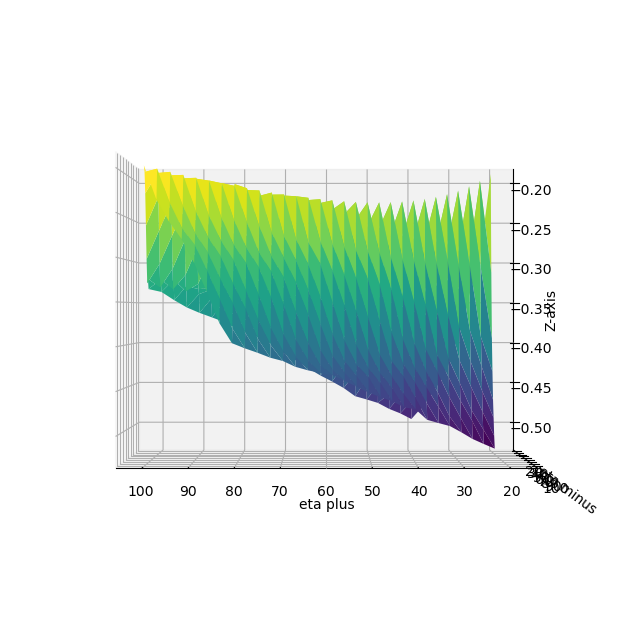

In [280]:
z_min, z_max = np.nanmin(z), np.nanmax(z)
print(z_min)
print(z_max)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=00, azim=90)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# ax.scatter(x_min, y_min, z_min, color='red', marker='o', s=100, label='Minimum Point')

# Show the plot
plt.show()

## Trying with smaller dalpha

In [1]:
from simulations import generate_simulations_bunchs
from parameters import Parameters, base_simulation_parameters_dict
import pandas as pd
import numpy as np


p = Parameters(**base_simulation_parameters_dict)
p.dalpha = 5
p.T = 60
p.n = 5
print(p)
results = generate_simulations_bunchs(p)

Parameters(q_max=4, T=60, A=300, dalpha=5, Delta=0.005, epsilon=0.005, psi=0.01, phi_=1e-06, eta_plus=60.0, eta_minus=60.0, sigma=0.01, k=200.0, xi=1.0, lambda_plus=1.0, lambda_minus=1.0, theta=0.1, s0=100, n=5, drift=True)
Calculating h
Starting h calculation
8.331944675887353e-05
720120
Starting to calculate h
Finished calculating h0.0 h                          e-07 h                            
Amount of simulations: 5
Mean of PNL:0.199999999999839673346355e-08 h                             
Stde of PNL:0.16164776521816587
500


In [52]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood

def multi_likelihood_to_minimize(x, k=200, theta=0.0001):
    bad_result = np.nan #1000 #
    # x=np.array([y[0], y[1], y[2], theta])
    # if np.abs(x[1]-x[2]) >20:
    #     return bad_result
    # if x[0]<0 or x[1]<0 or x[2]<0 or x[3]<0:
    #     return bad_result
    # if x[0]>1500 or x[1]>1500 or x[2]>1500 or x[3]>1500:
    #     return bad_result
    m = MaximumLikelihood.multi_likelihood_to_minimize(multi_params, x)/l/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    print(m)
    return m

In [21]:
l=5

In [22]:
from likelihood import MaximumLikelihood
tau0_plus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_plus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
s_jumps = (results['s']-np.roll(results['s'], 1))
t_minus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] < 0)), p.dt)
t_plus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] > 0)), p.dt)
multi_params = []
for i in range(l):
    t_p_arr = np.array(t_plus_dict[i])
    t_m_arr = np.array(t_minus_dict[i])
    multi_params.append(
        {
            "T": p.T,
            "tau_0_plus": np.array([tau0_plus_dict[i]]),
            "tau_0_minus": np.array([tau0_minus_dict[i]]),
            "t_plus": np.array([t_p_arr[t_p_arr != 0]]),
            "t_minus": np.array([t_m_arr[t_m_arr != 0]])
            })
multi_params[0].keys()
print(multi_params[0]['tau_0_minus'])
print(multi_params[0]['t_minus'])
print(multi_params[0]['tau_0_plus'])
print(multi_params[0]['t_plus'])

[[ 0.14889185  0.56698884  1.97117147  2.60931511  3.77403766  4.17955341
   5.87760373  7.02624563  7.56957174  8.0655724  10.24112648 12.15889018
  12.36585569 12.6958007  14.69963339 14.8530245  15.07690385 15.21288119
  15.25354108 16.81603066 17.25804033 17.48025329 18.38185302 18.69171805
  19.41168139 19.50333278 19.96558907 20.24204299 20.69871688 21.45109148
  22.27620397 22.68013664 23.18246959 24.88002    27.85269122 29.52707882
  29.80361606 30.1803866  30.30369938 31.39010165 32.04607565 33.41159807
  36.66530578 38.67155474 40.08590235 40.7052158  41.35510748 41.59998334
  43.74004333 46.54782536 47.1478087  50.46733878 50.892018   52.81786369
  52.87410432 54.19771705 55.78736877 56.10914848 56.27470422 56.59023496
  57.12056324 57.25729045 58.02674554]]
[[ 0.57507082  8.07648725 14.85502416 15.08115314 15.08490252 18.38501916
  21.46008999 24.88785202 27.85735711 30.30394934 30.3071988  40.08790202
  40.08981836 50.90051658]]
[[ 0.78103649  1.63206132  2.74070988  3.917

In [1]:

# Inequality constraints
# constraints = (
#     {'type': 'ineq', 'fun': lambda y: -np.abs(y[1] - y[2]) + 5},
# )

x0 = np.array([200, 50, 50, 0.2])  # the 4 parameters to optimize
# x0 = np.random.rand(4)*100
# x0 = np.ones(4)#*100
# x0 = np.zeros(2)

bounds = [(0, 100000), (0, 100000), (0, 100000), (0, 100000)] #(0, 2)
options = {'maxiter': 100000}
res = minimize(multi_likelihood_to_minimize, x0, method='L-BFGS-B',#
               options=options,
               # bounds=bounds,
            #    constraints=constraints,
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

NameError: name 'np' is not defined

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(20, 2000, 30)
y = np.linspace(20, 2000, 30)

x, y = np.meshgrid(x, y)

# Define a function for the surface
def surface_function(x, y):
    m= multi_likelihood_to_minimize(np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)

-0.056779189608915315
-0.056779189608915315
-0.0760272905373189
-0.08248168854951271
-0.08658877815689583
-0.08938010221333353
-0.0914122221763317
-0.09294923941032054
-0.09413743188829712
-0.09506631125059298
-0.09579461884116046
-0.0963629470278425
-0.09680047426209454
-0.09712882390996147
-0.09736439883094122
-0.09751985210413065
-0.0976050369554774
-0.09762761992047153
-0.09759345189234575
-0.09750672822930596
-0.09736989644132198
-0.09718312120018922
-0.09694264923228345
-0.09663529779777544
-0.09620890641031601
-0.09585235501622469
-0.09544551502790008
-0.09489017833397097
-0.0946026737901422
-0.09429690171348099
-0.09397413132335505
-0.0858416114027048
-0.10592676099826295
-0.11308067537424157
-0.11721634190679886
-0.12000079774975923
-0.12200267315566687
-0.12347895389074479
-0.12453426861086368
-0.12489482722457208
-0.12564761975401856
-0.12624124885500979
-0.12670533775152823
-0.12706193550262723
-0.12732789786433427
-0.12751640029762584
-0.1276379371236001
-0.127701003013441

-0.17112902927040302
-0.056779189608915315


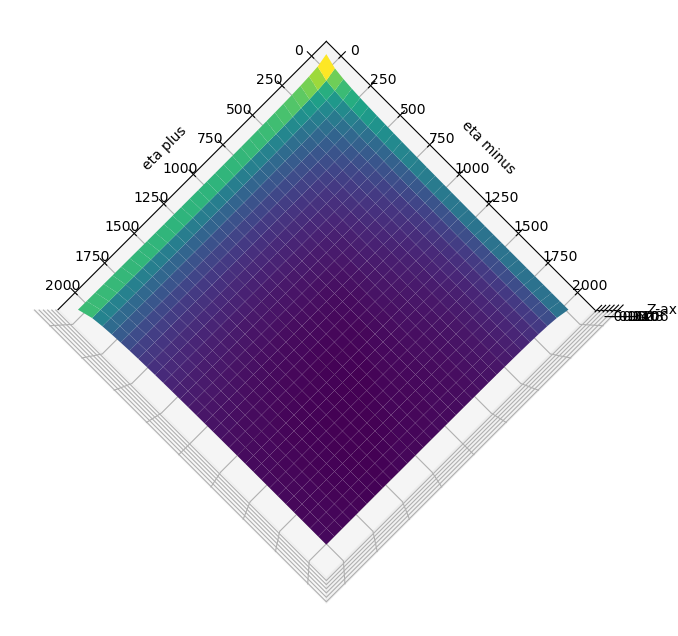

In [49]:
z_min, z_max = np.nanmin(z), np.nanmax(z)
print(z_min)
print(z_max)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=45)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# ax.scatter(x_min, y_min, z_min, color='red', marker='o', s=100, label='Minimum Point')

# Show the plot
plt.show()

## Reducing dalpha even more

In [316]:
from simulations import generate_simulations_bunchs
from parameters import Parameters, base_simulation_parameters_dict
import pandas as pd
import numpy as np


p = Parameters(**base_simulation_parameters_dict)
p.dalpha = 7
p.T = 60
p.n = 5
print(p)
results = generate_simulations_bunchs(p)

Parameters(q_max=4, T=60, A=300, dalpha=7, Delta=0.005, epsilon=0.005, psi=0.01, phi_=1e-06, eta_plus=60.0, eta_minus=60.0, sigma=0.01, k=200.0, xi=1.0, lambda_plus=1.0, lambda_minus=1.0, theta=0.1, s0=100, n=5, drift=True)
Calculating h
Starting h calculation
0.00011663931197088302
514406
Starting to calculate h
Finished calculating h0.0 h                          7e-07 h                           
Amount of simulations: 5
Mean of PNL:0.220999999999849827567274e-08 h                             
Stde of PNL:0.17359147444511985
500


In [339]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood

def multi_likelihood_to_minimize(y=None,x=None, k=200, theta=0.1):
    bad_result = np.nan #
    if y is not None:
        x=np.array([y[0], y[1], y[1], y[2]])
        bad_result = 1000 # 
    if np.abs(x[1]-x[2]) >20:
        return bad_result
    if x[0]<0 or x[1]<0 or x[2]<0 or x[3]<0:
        return bad_result
    if x[0]>1500 or x[1]>1500 or x[2]>1500 or x[3]>1500:
        return bad_result
    m = MaximumLikelihood.multi_likelihood_to_minimize(multi_params, x)/l/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    print(m)
    return m

l=5

from likelihood import MaximumLikelihood
tau0_plus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_plus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
s_jumps = (results['s']-np.roll(results['s'], 1))
t_minus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] < 0)), p.dt)
t_plus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] > 0)), p.dt)
multi_params = []
for i in range(l):
    t_p_arr = np.array(t_plus_dict[i])
    t_m_arr = np.array(t_minus_dict[i])
    multi_params.append(
        {
            "T": p.T,
            "tau_0_plus": np.array([tau0_plus_dict[i]]),
            "tau_0_minus": np.array([tau0_minus_dict[i]]),
            "t_plus": np.array([t_p_arr[t_p_arr != 0]]),
            "t_minus": np.array([t_m_arr[t_m_arr != 0]])
            })
multi_params[0].keys()
print(multi_params[0]['tau_0_minus'])
print(multi_params[0]['t_minus'])
print(multi_params[0]['tau_0_plus'])
print(multi_params[0]['t_plus'])

[[ 0.14883176  0.5669837   1.97120437  2.60933805  3.77398158  4.17953647
   5.87757157  7.02623551  7.56954143  8.06549178 10.24104823 12.1588318
  12.36574994 12.69572255 14.69958593 14.85296663 15.0769141  15.2127989
  15.25350602 16.81600625 17.25806924 17.48015049 18.38177237 18.69168302
  19.41158086 19.50325935 19.96550095 20.24193612 20.69869566 21.45101923
  22.27612572 22.68004766 23.18241317 24.87998172 27.85265122 29.52700855
  29.80356036 30.18030533 30.30359309 31.38997164 32.04595113 33.41144755
  36.6652178  38.67141397 40.08578226 40.70513701 41.35493462 41.59987717
  43.73985863 46.54771679 47.14770941 50.46714759 50.89194796 52.81777964
  52.87388315 54.1976227  55.78718324 56.10899111 56.27461893 56.59001163
  57.12048722 57.25707185 58.02654139]]
[[ 0.57083279  3.78564551  7.02716863  7.56977471 15.08484558 15.08496222
  15.21373202 15.21548161 16.81915551 17.48283319 20.70861    27.85440081
  30.18088853 33.41797935 36.67816476 38.6721138  41.35551781 41.35586773


In [340]:
# Inequality constraints
# constraints = (
#     {'type': 'ineq', 'fun': lambda y: -np.abs(y[1] - y[2]) + 5},
# )

x0 = np.array([100, 100, 0.1])  # the 4 parameters to optimize
# x0 = np.random.rand(4)*100
# x0 = np.ones(2)*100
# x0 = np.zeros(2)

bounds = [(10, 400), (10, 500), (0.01, 1)] #(0, 2)
options = {'maxiter': 1000}
res = minimize(multi_likelihood_to_minimize, x0, method='Nelder-Mead',#
               options=options,
               bounds=bounds,
            #    constraints=constraints,
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

0.0428237785497185
0.037357071838484565
0.0477089767041222
0.04269138117605098
0.034382538357615205
0.028172677706337263
0.029538802176037868
0.021920658938882138
0.013329494680794135
0.010812773050826561
-5.7991378556133103e-05
-0.0008252139651279549
-0.011928889046927382
-0.018695989489164025
-0.02602555454280939
-0.02144878276367927
-0.019555012517544705
-0.019997809593864355
-0.026023410221513596
-0.02141064173369716
-0.024368337811318447
-0.025229790538354686
-0.027907524203969282
-0.029402481029227864
-0.02601024187620977
-0.027167852220957127
-0.029079866214727978
-0.03105803983249275
-0.03303048607035835
-0.032892111162221606
-0.03434647649869032
-0.03633603111183011
-0.03795406014099918
-0.040868098185465156
-0.04001637268077182
-0.041508683697044295
-0.04018644819475955
-0.0413928576913638
-0.041037825621040365
-0.039684858784263685
-0.041278641199489916
-0.04106104008654775
-0.04135137146390229
-0.041228548893624636
-0.0413773953844043
-0.04128661329919252
-0.041420874935145

In [341]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(20, 100, 30)
y = np.linspace(20, 100, 30)

x, y = np.meshgrid(x, y)

# Define a function for the surface
def surface_function(x, y):
    m= multi_likelihood_to_minimize(x=np.array([250,x,y,0.14]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)

-0.029758857449840186
-0.029758857449840186
-0.018481853179789974
-0.013126648175746223
-0.018260502123112723
-0.02294675610184992
-0.023793189526539825
-0.02632051615991668
-0.028282889237297593
-0.027081893015697255
-0.031060449065344293
-0.021035729880893562
-0.017153545109082294
-0.016061790456485564
-0.022140027034431475
-0.023452077237893092
-0.02484733741409263
-0.026865859524073662
-0.0312556725400706
-0.028815368201803086
-0.032066284355596504
-0.023765418775686612
-0.01916166924100418
-0.016776136838138805
-0.019944683248773052
-0.023705459431808913
-0.023336572708533926
-0.025425512186426757
-0.03361615838540092
-0.029653161131847947
-0.030154322123178
-0.03283693689330748
-0.023677439657692693
-0.02153276885629128
-0.014890733507314518
-0.01756950439531085
-0.022637334657785165
-0.023317316033280702
-0.023959001650151638
-0.039024287726064484
-0.033403266868266335
-0.028624498803823947
-0.03221562402209317
-0.03341607878858527
-0.023367556946142117
-0.02106776526581442
-0.0

-0.048031073826646786
-0.007407883642207683


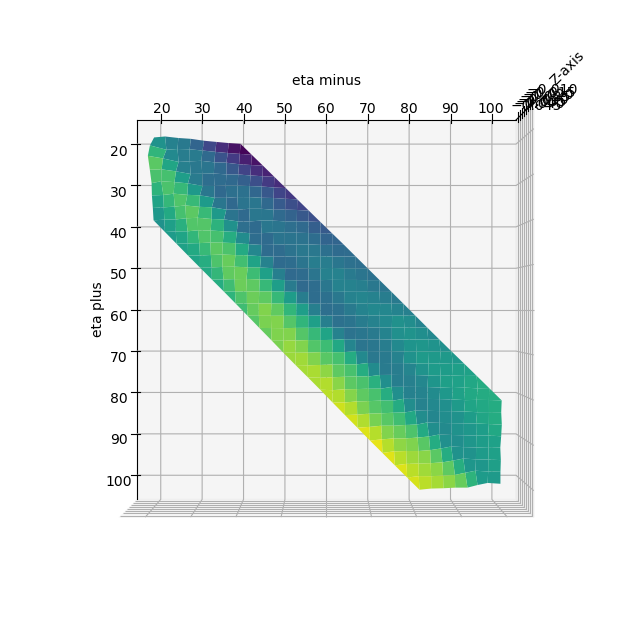

In [352]:
z_min, z_max = np.nanmin(z), np.nanmax(z)
print(z_min)
print(z_max)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=0)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# ax.scatter(x_min, y_min, z_min, color='red', marker='o', s=100, label='Minimum Point')

# Show the plot
plt.show()

## Lower dalpha

In [1]:
from simulations import generate_simulations_bunchs
from parameters import Parameters, base_simulation_parameters_dict
import pandas as pd
import numpy as np


p = Parameters(**base_simulation_parameters_dict)
p.dalpha = 3
p.T = 60
p.n = 5
print(p)
results = generate_simulations_bunchs(p)

Parameters(q_max=4, T=60, A=300, dalpha=3, Delta=0.005, epsilon=0.005, psi=0.01, phi_=1e-06, eta_plus=60.0, eta_minus=60.0, sigma=0.01, k=200.0, xi=1.0, lambda_plus=1.0, lambda_minus=1.0, theta=0.1, s0=100, n=5, drift=True)
Calculating h
Starting h calculation
4.999486163922042e-05
1200123
Starting to calculate h
Finished calculating h- 0.0 h                          47e-07 h                          
Amount of simulations: 5
Mean of PNL:0.291999999999885781998697e-08 h                             
Stde of PNL:0.15285941253329532
500


In [2]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood

def multi_likelihood_to_minimize(y=None,x=None, k=200, theta=0.1):
    bad_result = np.nan #
    if y is not None:
        x=np.array([y[0], y[1], y[1], y[2]])
        bad_result = 1000 # 
    if np.abs(x[1]-x[2]) >20:
        return bad_result
    if x[0]<0 or x[1]<0 or x[2]<0 or x[3]<0:
        return bad_result
    if x[0]>1500 or x[1]>1500 or x[2]>1500 or x[3]>1500:
        return bad_result
    m = MaximumLikelihood.multi_likelihood_to_minimize(multi_params, x)/l/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    print(m)
    return m

l=5

from likelihood import MaximumLikelihood
tau0_plus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_plus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
s_jumps = (results['s']-np.roll(results['s'], 1))
t_minus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] < 0)), p.dt)
t_plus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] > 0)), p.dt)
multi_params = []
for i in range(l):
    t_p_arr = np.array(t_plus_dict[i])
    t_m_arr = np.array(t_minus_dict[i])
    multi_params.append(
        {
            "T": p.T,
            "tau_0_plus": np.array([tau0_plus_dict[i]]),
            "tau_0_minus": np.array([tau0_minus_dict[i]]),
            "t_plus": np.array([t_p_arr[t_p_arr != 0]]),
            "t_minus": np.array([t_m_arr[t_m_arr != 0]])
            })
multi_params[0].keys()
print(multi_params[0]['tau_0_minus'])
print(multi_params[0]['t_minus'])
print(multi_params[0]['tau_0_plus'])
print(multi_params[0]['t_plus'])

[[ 0.14893469  0.56699173  1.9711974   2.60933182  3.77406211  4.17962043
   5.87759591  7.02627785  7.56957202  8.06557104 10.24109744 12.15890034
  12.36577907 12.69579515 14.69958921 14.85297344 15.07690043 15.21283646
  15.25353228 16.81602169 17.25802626 17.48020342 18.38181076 18.69167891
  19.41165491 19.50334549 19.96549799 20.24201957 20.69872263 21.45099531
  22.27616051 22.68006899 23.18246736 24.87999289 27.85263737 29.52701528
  29.80353686 30.18029814 30.30358546 31.3900238  32.04600638 33.41151604
  36.66523163 38.67142544 40.08583007 40.70516641 41.35494963 41.59987446
  43.73990451 46.54771593 47.14770426 50.46721309 50.89191944 52.81777151
  52.87396573 54.19757969 55.78726631 56.10903324 56.27461622 56.5900838
  57.12047928 57.25711524 58.02658616]]
[[ 3.78176132  4.18072031  5.8874949   7.5706719   7.57417154 16.81637165
  17.49445196 18.69507856 19.50719509 19.96874766 20.24336943 24.88034285
  30.30408541 36.68472963 38.68487405 40.09317931 41.35979913 41.60452398

In [5]:
# Inequality constraints
# constraints = (
#     {'type': 'ineq', 'fun': lambda y: -np.abs(y[1] - y[2]) + 5},
# )

x0 = np.array([100, 100, 0.1])  # the 4 parameters to optimize
# x0 = np.random.rand(4)*100
# x0 = np.ones(2)*100
# x0 = np.zeros(2)

bounds = [(10, 400), (10, 500), (0.01, 1)] #(0, 2)
options = {'maxiter': 1000}
res = minimize(multi_likelihood_to_minimize, x0, method='Nelder-Mead',#
               options=options,
               bounds=bounds,
            #    constraints=constraints,
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

0.05953956158926646
0.054021930403977673
0.06457093457656041
0.059407369578109596
0.05091079317401019
0.04452220277911535
0.045980525689350044
0.03817164094237009
0.029332343573644715
0.02663692192524535
0.015261855723531358
0.014477874914589631
0.002643269881261196
-0.0046824004168557806
-0.014136014560059237
-0.011422454247287295
-0.010251010721910784
-0.010797938376387173
-0.014565841859620713
-0.014052203392241244
-0.008775601621667375
-0.013578673857963344
-0.015846826391819342
-0.01627652973848234
-0.012513856301659448
-0.015203907841073682
-0.017030425342566265
-0.018171734765970903
-0.018741924615096817
-0.02025709592860306
-0.02031866264248441
-0.02161483251451766
-0.023338809972216126
-0.025499085619927732
-0.02566848492192039
-0.024101087870150625
-0.025016319633166483
-0.024364470283447487
-0.02579798176522947
-0.02597694993710117
-0.024970484934625864
-0.026193036518293286
-0.024651267937055375
-0.02652980416047726
-0.02677931265668726
-0.026756483203273583
-0.025624340903

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(20, 100, 30)
y = np.linspace(20, 100, 30)

x, y = np.meshgrid(x, y)

# Define a function for the surface
def surface_function(x, y):
    m= multi_likelihood_to_minimize(x=np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)

-0.016889323579608293
-0.016889323579608293
-0.007300218032123107
-0.0007695846791283074
-0.0026575998625212403
-0.005373063174326248
-0.006946507377295842
-0.010397921809600337
-0.012967780125832698
-0.021499925632751656
-0.017509502885337504
-0.00878833882488147
-0.0006089684812962097
0.001159384985214779
-0.004637924658956638
-0.006389566122177849
-0.007488661452099935
-0.010251177675345184
-0.027721966012530703
-0.021573753483214813
-0.01787343398909441
-0.006963161962574183
-0.0017553698528425172
0.0027417034348361825
-0.0028448238375809167
-0.004613340087515123
-0.006048609756050479
-0.007396461194951324
-0.03456436575685099
-0.027255331344933097
-0.0221366124652142
-0.01803372621512437
-0.007956857402760148
-0.0030236680973641005
0.0005535499557359793
-0.0005782472297676818
-0.0037790561081314706
-0.004326537904323914
-0.004953455616634243
-0.03995509783257012
-0.03454812546393042
-0.02519270940584803
-0.023511059599703055
-0.018028284840571708
-0.011261979381295837
-0.003684914

-0.04844074210226284
0.017833537615296415


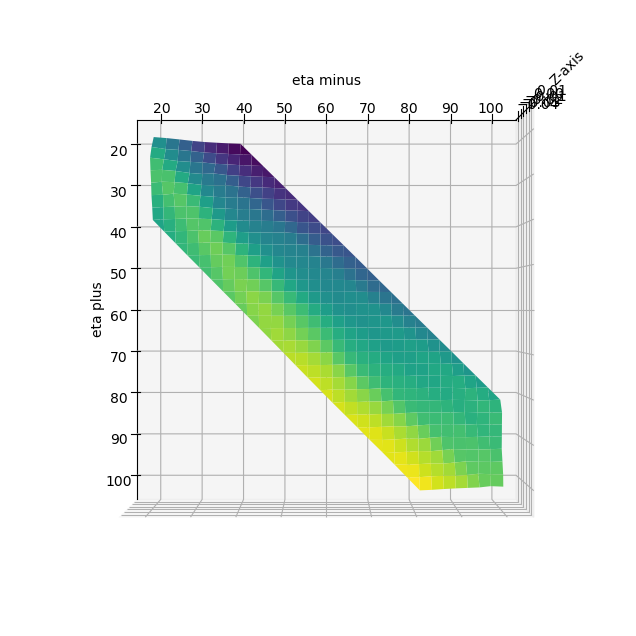

In [22]:
z_min, z_max = np.nanmin(z), np.nanmax(z)
print(z_min)
print(z_max)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=00)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# ax.scatter(x_min, y_min, z_min, color='red', marker='o', s=100, label='Minimum Point')

# Show the plot
plt.show()

In [ ]:
from simulations import generate_simulations_bunchs
from parameters import Parameters, base_simulation_parameters_dict
import pandas as pd
import numpy as np


p = Parameters(**base_simulation_parameters_dict)
p.dalpha = 3
p.T = 30
p.n = 100
print(p)
results = generate_simulations_bunchs(p)

## Even Lower dalpha: 2

In [1]:
from simulations import generate_simulations_bunchs
from parameters import Parameters, base_simulation_parameters_dict
import pandas as pd
import numpy as np


p = Parameters(**base_simulation_parameters_dict)
p.dalpha = 2
p.T = 30
p.n = 5
print(p)
results = generate_simulations_bunchs(p)

Parameters(q_max=4, T=30, A=300, dalpha=2, Delta=0.005, epsilon=0.005, psi=0.01, phi_=1e-06, eta_plus=60.0, eta_minus=60.0, sigma=0.01, k=200.0, xi=1.0, lambda_plus=1.0, lambda_minus=1.0, theta=0.1, s0=100, n=5, drift=True)
Calculating h
Starting h calculation
3.333097238945575e-05
900063
Starting to calculate h


: 

## Getting real data to estimate brazil parameters

In [ ]:
import pandas as pd
df = pd.read_csv("brazil_parameters/md_20230731.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [1]:
df["timestamp"] =  df["timestamp"] - df["timestamp"].min()
df["time"] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
tau0_plus = df[df["ismoplus"]]['time'].unique()
tau0_minus = df[df["ismominus"]]['time'].unique()
t_minus = df[df["isjumpplus"]]['time'].unique()
t_plus = df[df["isjumpminus"]]['time'].unique()
T=df["time"].max()

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood

def multi_likelihood_to_minimize(y=None,x=None, k=200, theta=0.1):
    bad_result = np.nan #
    if y is not None:
        x=np.array([y[0], y[1], y[1], y[2]])
        bad_result = 1000 # 
    if np.abs(x[1]-x[2]) >20:
        return bad_result
    if x[0]<0 or x[1]<0 or x[2]<0 or x[3]<0:
        return bad_result
    if x[0]>1500 or x[1]>1500 or x[2]>1500 or x[3]>1500:
        return bad_result
    m = MaximumLikelihood.multi_likelihood_to_minimize(multi_params, x)/l/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    print(m)
    return m

l=5

from likelihood import MaximumLikelihood
tau0_plus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_plus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
s_jumps = (results['s']-np.roll(results['s'], 1))
t_minus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] < 0)), p.dt)
t_plus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] > 0)), p.dt)
multi_params = []
for i in range(l):
    t_p_arr = np.array(t_plus_dict[i])
    t_m_arr = np.array(t_minus_dict[i])
    multi_params.append(
        {
            "T": p.T,
            "tau_0_plus": np.array([tau0_plus_dict[i]]),
            "tau_0_minus": np.array([tau0_minus_dict[i]]),
            "t_plus": np.array([t_p_arr[t_p_arr != 0]]),
            "t_minus": np.array([t_m_arr[t_m_arr != 0]])
            })
multi_params[0].keys()
print(multi_params[0]['tau_0_minus'])
print(multi_params[0]['t_minus'])
print(multi_params[0]['tau_0_plus'])
print(multi_params[0]['t_plus'])

[[ 0.14893469  0.56699173  1.9711974   2.60933182  3.77406211  4.17962043
   5.87759591  7.02627785  7.56957202  8.06557104 10.24109744 12.15890034
  12.36577907 12.69579515 14.69958921 14.85297344 15.07690043 15.21283646
  15.25353228 16.81602169 17.25802626 17.48020342 18.38181076 18.69167891
  19.41165491 19.50334549 19.96549799 20.24201957 20.69872263 21.45099531
  22.27616051 22.68006899 23.18246736 24.87999289 27.85263737 29.52701528
  29.80353686 30.18029814 30.30358546 31.3900238  32.04600638 33.41151604
  36.66523163 38.67142544 40.08583007 40.70516641 41.35494963 41.59987446
  43.73990451 46.54771593 47.14770426 50.46721309 50.89191944 52.81777151
  52.87396573 54.19757969 55.78726631 56.10903324 56.27461622 56.5900838
  57.12047928 57.25711524 58.02658616]]
[[ 3.78176132  4.18072031  5.8874949   7.5706719   7.57417154 16.81637165
  17.49445196 18.69507856 19.50719509 19.96874766 20.24336943 24.88034285
  30.30408541 36.68472963 38.68487405 40.09317931 41.35979913 41.60452398

In [ ]:
# Inequality constraints
# constraints = (
#     {'type': 'ineq', 'fun': lambda y: -np.abs(y[1] - y[2]) + 5},
# )

x0 = np.array([100, 100, 0.1])  # the 4 parameters to optimize
# x0 = np.random.rand(4)*100
# x0 = np.ones(2)*100
# x0 = np.zeros(2)

bounds = [(10, 400), (10, 500), (0.01, 1)] #(0, 2)
options = {'maxiter': 1000}
res = minimize(multi_likelihood_to_minimize, x0, method='Nelder-Mead',#
               options=options,
               bounds=bounds,
            #    constraints=constraints,
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

0.05953956158926646
0.054021930403977673
0.06457093457656041
0.059407369578109596
0.05091079317401019
0.04452220277911535
0.045980525689350044
0.03817164094237009
0.029332343573644715
0.02663692192524535
0.015261855723531358
0.014477874914589631
0.002643269881261196
-0.0046824004168557806
-0.014136014560059237
-0.011422454247287295
-0.010251010721910784
-0.010797938376387173
-0.014565841859620713
-0.014052203392241244
-0.008775601621667375
-0.013578673857963344
-0.015846826391819342
-0.01627652973848234
-0.012513856301659448
-0.015203907841073682
-0.017030425342566265
-0.018171734765970903
-0.018741924615096817
-0.02025709592860306
-0.02031866264248441
-0.02161483251451766
-0.023338809972216126
-0.025499085619927732
-0.02566848492192039
-0.024101087870150625
-0.025016319633166483
-0.024364470283447487
-0.02579798176522947
-0.02597694993710117
-0.024970484934625864
-0.026193036518293286
-0.024651267937055375
-0.02652980416047726
-0.02677931265668726
-0.026756483203273583
-0.025624340903

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(20, 100, 30)
y = np.linspace(20, 100, 30)

x, y = np.meshgrid(x, y)

# Define a function for the surface
def surface_function(x, y):
    m= multi_likelihood_to_minimize(x=np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)

-0.016889323579608293
-0.016889323579608293
-0.007300218032123107
-0.0007695846791283074
-0.0026575998625212403
-0.005373063174326248
-0.006946507377295842
-0.010397921809600337
-0.012967780125832698
-0.021499925632751656
-0.017509502885337504
-0.00878833882488147
-0.0006089684812962097
0.001159384985214779
-0.004637924658956638
-0.006389566122177849
-0.007488661452099935
-0.010251177675345184
-0.027721966012530703
-0.021573753483214813
-0.01787343398909441
-0.006963161962574183
-0.0017553698528425172
0.0027417034348361825
-0.0028448238375809167
-0.004613340087515123
-0.006048609756050479
-0.007396461194951324
-0.03456436575685099
-0.027255331344933097
-0.0221366124652142
-0.01803372621512437
-0.007956857402760148
-0.0030236680973641005
0.0005535499557359793
-0.0005782472297676818
-0.0037790561081314706
-0.004326537904323914
-0.004953455616634243
-0.03995509783257012
-0.03454812546393042
-0.02519270940584803
-0.023511059599703055
-0.018028284840571708
-0.011261979381295837
-0.003684914

-0.04844074210226284
0.017833537615296415


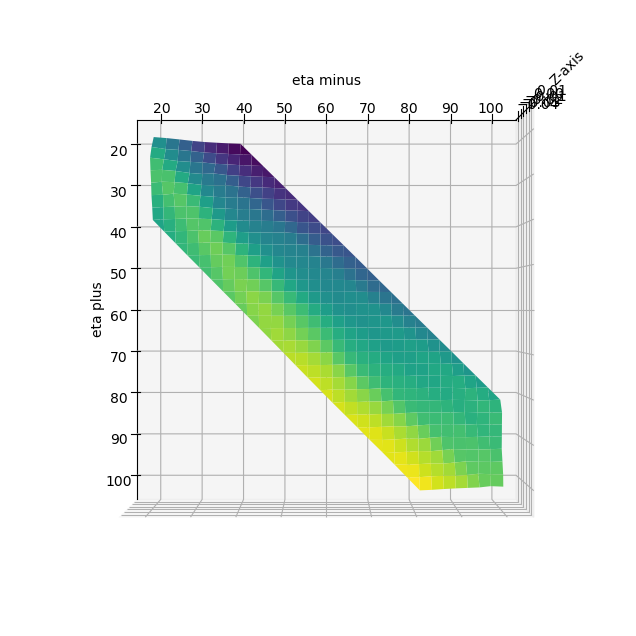

In [ ]:
z_min, z_max = np.nanmin(z), np.nanmax(z)
print(z_min)
print(z_max)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=00)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# ax.scatter(x_min, y_min, z_min, color='red', marker='o', s=100, label='Minimum Point')

# Show the plot
plt.show()